<a href="https://colab.research.google.com/github/zestypratyush/HLS_of_digit_recognation/blob/main/Hand_digit_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


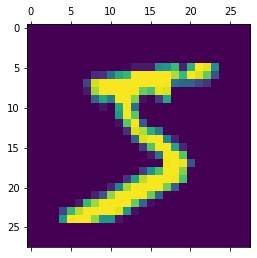

In [3]:
plt.matshow(X_train[0])

In [4]:
y_train[0]

5

In [5]:
X_train = X_train / 255
X_test = X_test / 255

In [6]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [16]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2705 - accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1207 - accuracy: 0.9649
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0820 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0648 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0493 - accuracy: 0.9851


In [17]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


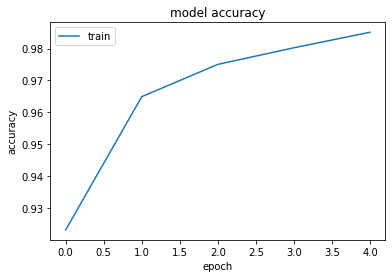

In [22]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

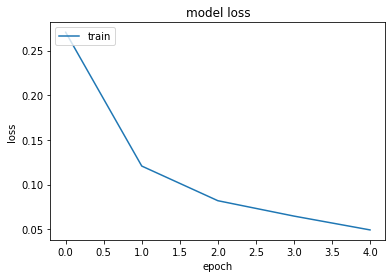

In [23]:
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [8]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0766 - accuracy: 0.9763


[0.07661297172307968, 0.9763000011444092]

In [9]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]


313/313 [==============================] - 1s 1ms/step


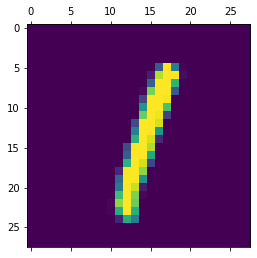

In [10]:
plt.matshow(X_test[5])

In [11]:
y_predicted_labels[5]

1

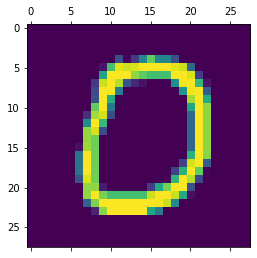

In [12]:
plt.matshow(X_test[10])

In [13]:
y_predicted_labels[10]

0

In [ ]:
model.save_weights('gfgModelWeights.h5')
print('Model Saved!')

Model Saved!


In [ ]:
loc = "./" # save location
shape_dict = {} # (layer name:shape) save dictionary


In [ ]:
for layer in model.layers:
  print(layer.get_weights())
  print("layer finished")

[array([[-0.00858498, -0.01421284,  0.06468081, ...,  0.02831661,
         0.03411277, -0.07334102],
       [-0.0458426 , -0.08095226,  0.04041822, ...,  0.05982952,
         0.06542607,  0.04070672],
       [-0.03146183, -0.02677828,  0.07563864, ...,  0.0064632 ,
         0.0404685 , -0.0011572 ],
       ...,
       [ 0.02420066,  0.05263384,  0.05258138, ...,  0.02264171,
        -0.00404868,  0.05404042],
       [ 0.05775008,  0.06656687,  0.05502811, ..., -0.06415351,
         0.0262916 , -0.00691866],
       [-0.05169982,  0.0500802 ,  0.00808757, ..., -0.06659962,
        -0.04098063, -0.04461382]], dtype=float32), array([-0.02286784,  0.01223597, -0.01516971,  0.05165223,  0.03671602,
       -0.07341834, -0.04742917,  0.02568727, -0.0387884 ,  0.06533167,
       -0.00953382,  0.10457503,  0.12709603, -0.1033497 , -0.03024458,
       -0.10104698, -0.02389798,  0.14500341,  0.18509598, -0.01148577,
        0.07767199,  0.07899873,  0.00588017, -0.01590396,  0.05980876,
        0.

In [ ]:
for layer in model.layers:
    if layer.get_weights() != []:
        shape_dict[layer.name] = np.shape(layer.get_weights()[1]) # No bias, only weights saved (initialized bias=0)
        np.savetxt(loc + layer.name +".csv", layer.get_weights()[1].flatten(), delimiter=",")

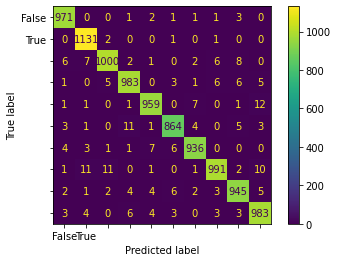

In [14]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_predicted_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

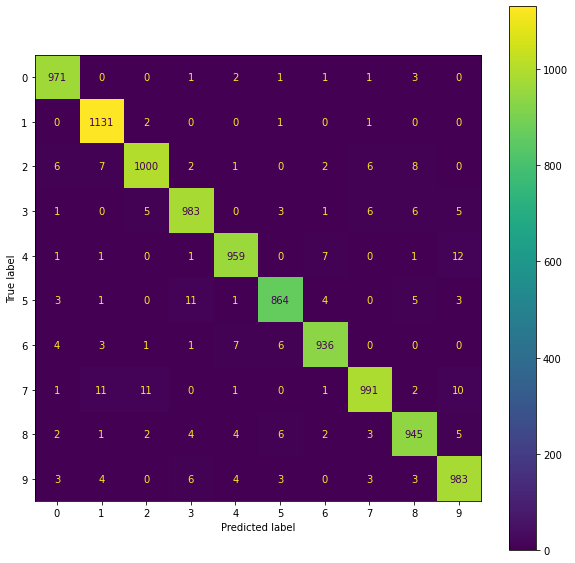

In [15]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predicted_labels)
fig = disp.ax_.get_figure() 
fig.set_figwidth(10)
fig.set_figheight(10)